1.	Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\honoc\Documents\CareerFoundry Folder\Python Fundamentals for Data Analysts\Exercise 4.3 Folder'
path
ords_prods_merge = pd.read_pickle(os.path.join(path, 'Prepared data', 'instacart_merged.pkl'))

In [3]:
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,last_name,Gender,State,Age,date_joined,number_of_dependants,marital_status,customer_income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
3,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
4,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both


2.	If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

<Axes: xlabel='orders_day_of_week'>

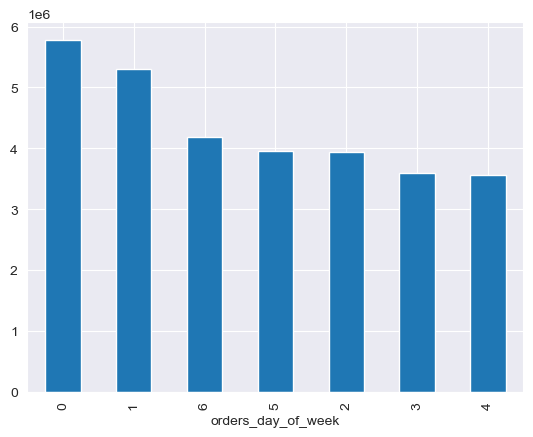

In [4]:
# Creating a bar chart for column "orders_day_of_week"
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

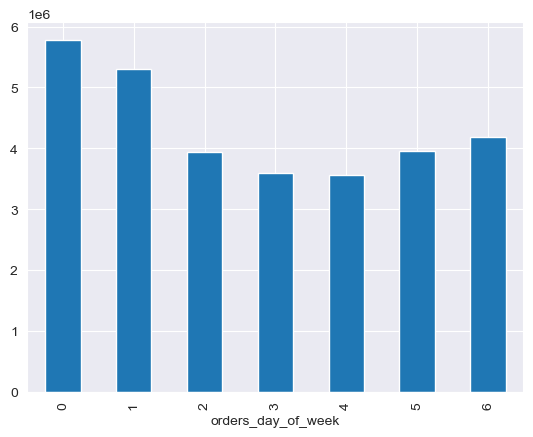

In [5]:
# Making the index appear chronologically
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

To add color and make the bars more distinct, use the “color = []” in your plot.bar().

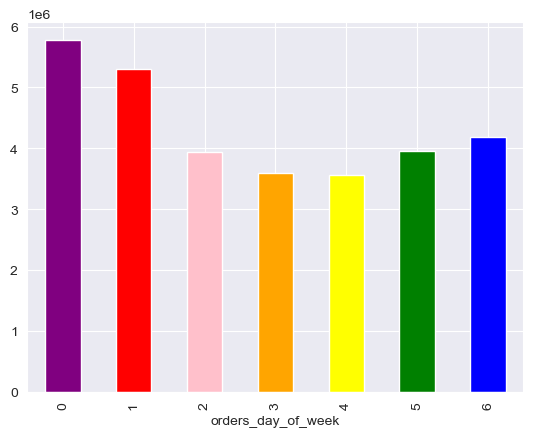

In [6]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

Exporting Bar Chart

In [7]:
bar.figure.savefig(os.path.join(path, 'Visualizations', 'Ex_4.9_Charts', 'bar_orders_dow.png'))

Creating Histograms and Scatterplots “.plot.hist(bins = )” NOTE: To determine the granularity of Histograms: smaller no. of bins = denser bars; larger no. of bins = sparser bars. Plotting histogram of "prices"

<Axes: ylabel='Frequency'>

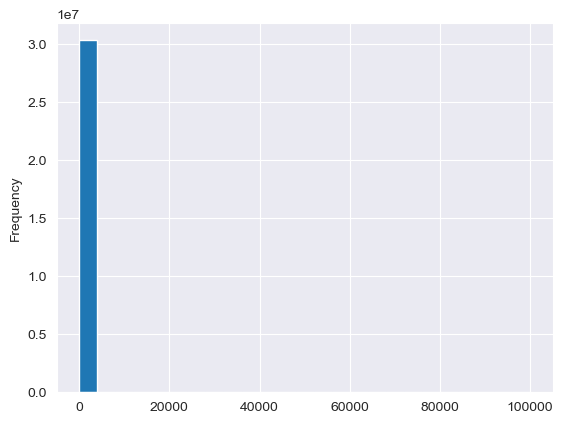

In [8]:
ords_prods_merge['prices'].plot.hist(bins=25)

Investigating why we have a single bar instead of 25 bars

In [9]:
ords_prods_merge['prices'].describe()

count    3.032876e+07
mean     1.197725e+01
std      4.963730e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

Something is odd in the maximum value. To investigate further, we conduct a few checks for each specific statistic:

In [10]:
ords_prods_merge['prices'].mean()

11.977249441396584

In [11]:
ords_prods_merge['prices'].median()

7.4

In [12]:
ords_prods_merge['prices'].max()

99999.0

While the mean and median are between 7 and 12 (relatively realistic), the max value yields a strange result. How could an item cost $99,999.00? This must be the result of data corruption or some kind of special value within the data. Employing a Scatterplot to investigate the possibility of an outlier.

<Axes: xlabel='prices', ylabel='prices'>

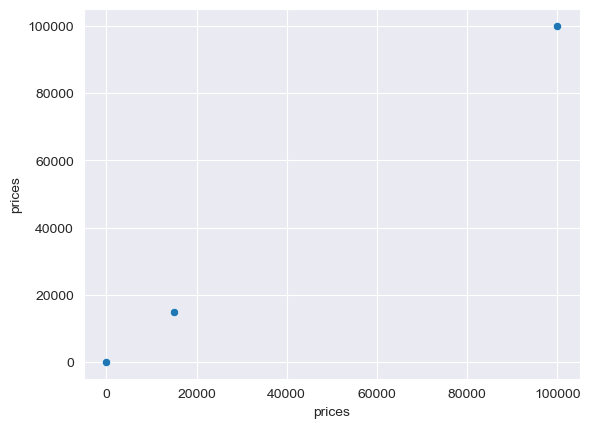

In [13]:
sns.scatterplot(x = 'prices', y = 'prices', data=ords_prods_merge)

Here, the “prices” column has been used for both the x- and y-axes. The mean of the column is around 12, so you’d expect the data points to be distributed somewhere around this number. However, there are two data points far, far beyond values you’d ever expect—values close to 20,000 and even 100,000. This close-to-100,000 value corresponds to the max value you identified in your checks. But what about the close-to-20,000 value? To investigate this, you can run a few more exploratory checks on your data.

Let’s first determine whether there are any values above a certain threshold in your data, for instance, anything above the “normal” price of a supermarket item. If you imagined the maximum price anyone would pay in a supermarket were around $100, then anything above that amount could be considered an outlier. Run this check via the following code:

In [14]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,last_name,Gender,State,Age,date_joined,number_of_dependants,marital_status,customer_income,_merge
21652,33664,2 % Reduced Fat Milk,84,16,99999.0,1489110,43360,3,1,10,...,Marilyn,Baker,Female,Florida,67,7/16/2017,3,married,149199,both
21653,33664,2 % Reduced Fat Milk,84,16,99999.0,2322035,43360,4,1,10,...,Marilyn,Baker,Female,Florida,67,7/16/2017,3,married,149199,both
21654,33664,2 % Reduced Fat Milk,84,16,99999.0,420339,43360,5,1,10,...,Marilyn,Baker,Female,Florida,67,7/16/2017,3,married,149199,both
21655,33664,2 % Reduced Fat Milk,84,16,99999.0,2912515,43360,7,2,9,...,Marilyn,Baker,Female,Florida,67,7/16/2017,3,married,149199,both
27042,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,518829,54136,22,1,9,...,Benjamin,Parsons,Male,New Jersey,40,1/28/2020,0,single,160524,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30304031,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,285306,136909,4,1,17,...,Deborah,Dillon,Female,New Jersey,30,5/14/2017,2,married,161606,both
30304032,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,2744314,136909,13,6,12,...,Deborah,Dillon,Female,New Jersey,30,5/14/2017,2,married,161606,both
30318809,33664,2 % Reduced Fat Milk,84,16,99999.0,2235868,35869,4,0,21,...,Theresa,Stein,Female,Iowa,32,2/16/2017,1,married,105422,both
30318843,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,2716179,2700,7,2,7,...,Charles,Crosby,Male,Washington,67,4/19/2019,0,divorced/widowed,225873,both


From the output, there are 4,776 rows with outlier observations (i.e., prices > 100). And in addition to the 99,999, there’s also 14,900, which corresponds to the second unexplainable point in the scatterplot. And these values are responsible for the skew in the chart.
The outliers will therefore be marked as missing values, as they don’t make sense in terms of other values in the column.


In [15]:
# Replacing Outliers with Missing values
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan
ords_prods_merge['prices'].max()

25.0

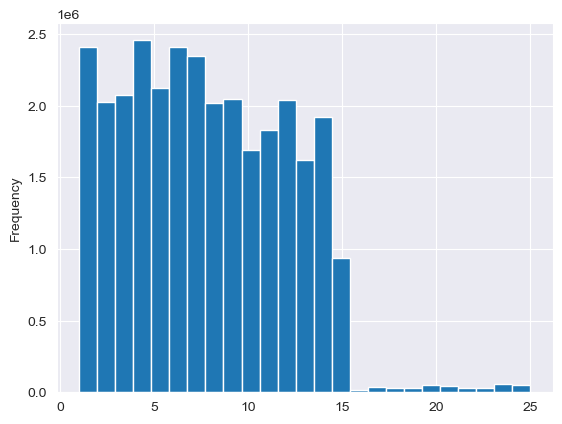

In [16]:
hist = ords_prods_merge['prices'].plot.hist(bins= 25)

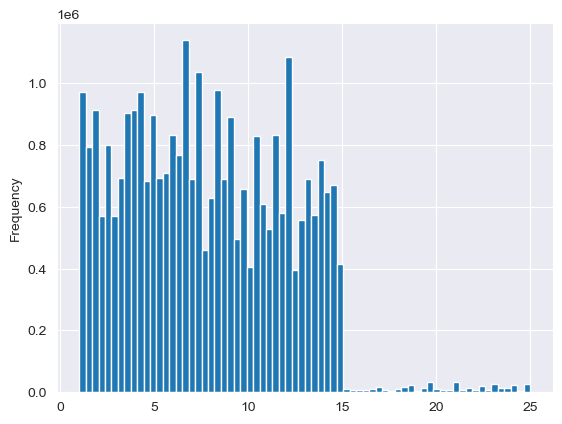

In [17]:
# To increase the level of granularity in the histogram, simply increase the number of bins to, say, 70.
hist_2 = ords_prods_merge['prices'].plot.hist(bins= 70)

In [18]:
hist_2.figure.savefig(os.path.join(path, 'Visualizations', 'Ex_4.9_Charts', 'hist_prices.png'))

CREATING LINE CHARTS

SAMPLING DATA: In order to create a subset that actually represents the entirety of your data, you’d need more than just the first 2,000,000 rows. And, more importantly, those rows would need to be RANDOMIZED.

In [19]:
# Create a list holding True/False values to test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [20]:
dev

array([False,  True, False, ...,  True, False,  True])

In [21]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [22]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [23]:
len(ords_prods_merge)

30328763

In [24]:
# Adding big + small
len(big) + len(small)

30328763

As one last step before creating that chart, let’s do something that will speed up the processing time even further—reducing your samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.”

In [25]:
df_2 = small[['orders_day_of_week', 'prices']]

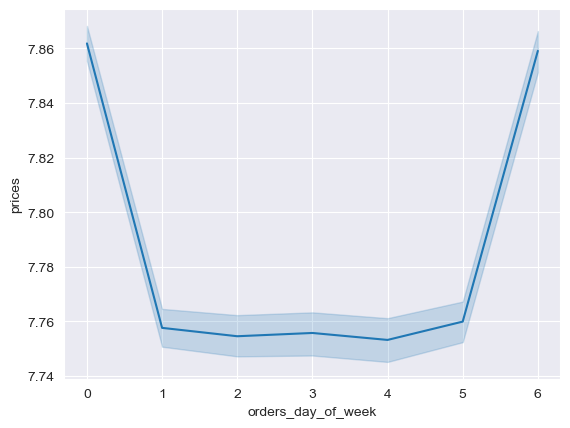

In [26]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [27]:
line.figure.savefig(os.path.join(path, 'Visualizations', 'Ex_4.9_Charts', 'line_prices_orders_dow.png'))

3.	You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
o	In a markdown cell beneath your histogram, describe what the histogram demonstrates.


In [28]:
ords_prods_merge['order_hour_of_day'].describe()

count    3.032876e+07
mean     1.341142e+01
std      4.246834e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

In [29]:
# first we need to know on which hour most orders take place.
ords_prods_merge['order_hour_of_day'].value_counts(dropna= False)

order_hour_of_day
10    2593725
11    2564597
14    2517238
15    2487586
13    2487500
12    2445841
16    2364969
9     2311334
17    1943858
8     1622394
18    1520954
19    1169224
20     910005
7      844665
21     746254
22     592432
23     375889
6      274801
0      203460
1      108110
5       82706
2       63961
4       49400
3       47860
Name: count, dtype: int64

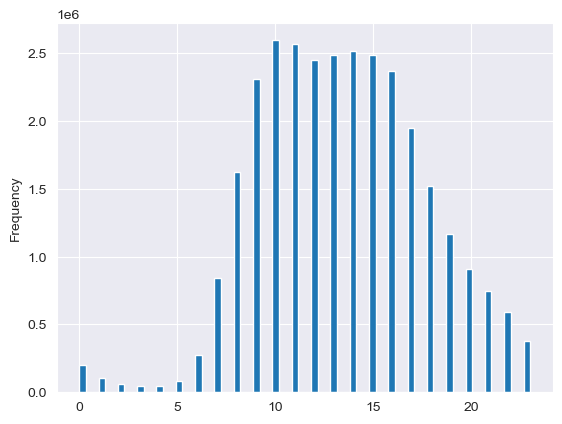

In [30]:
hist_order_hod = ords_prods_merge['order_hour_of_day'].plot.hist(bins= 70)

The histogram shows that most orders are placed between 10am and 12pm, and between 2pm and 4pm. This pattern is likely due to people placing orders during their wakeup hours and or need to prepare for meals. The fewest orders are placed between 2am and 4am.

In [31]:
hist_order_hod.figure.savefig(os.path.join(path, 'Visualizations', 'Ex_4.9_Charts', 'hist_order_hod.png'))

4.	The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

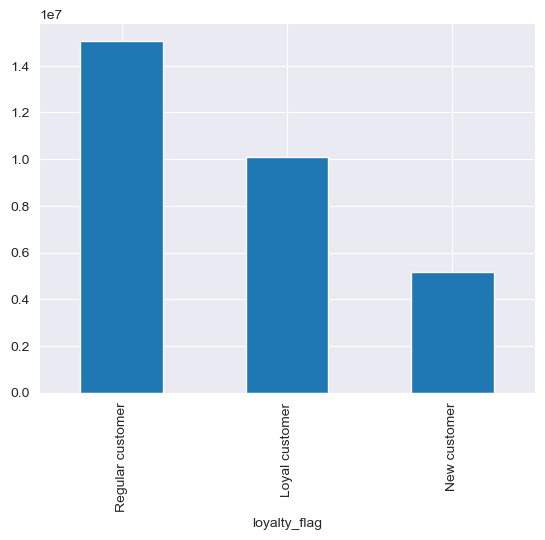

In [32]:
bar_loyalty = ords_prods_merge['loyalty_flag'].value_counts().plot.bar()

In [33]:
bar_loyalty.figure.savefig(os.path.join(path, 'Visualizations', 'Ex_4.9_Charts', 'loyalty_flag_bar.png'))

5.	Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [34]:
df_3 = small[['order_hour_of_day', 'prices']]

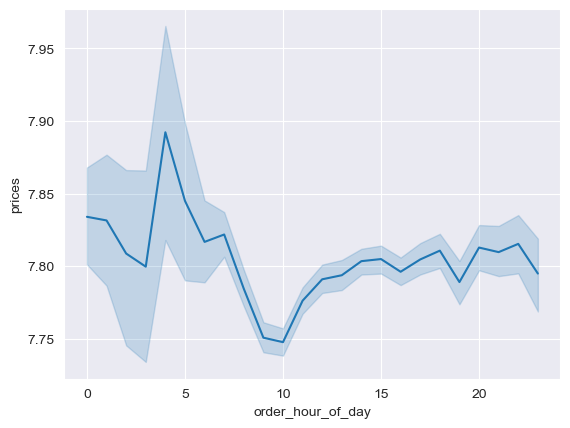

In [35]:
line_price_hour = sns.lineplot(data= df_3, x= 'order_hour_of_day', y= 'prices')

The line indicates that the price of the products is the same regardless of the hour of the day. This is likely because the prices are typically set and do not fluctuate depending on the time of day.

In [36]:
line_price_hour.figure.savefig(os.path.join(path, 'Visualizations', 'Ex_4.9_Charts', 'line_price_hour.png'))

6.	Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
o	In a markdown cell beneath your line chart, describe what the line chart shows.


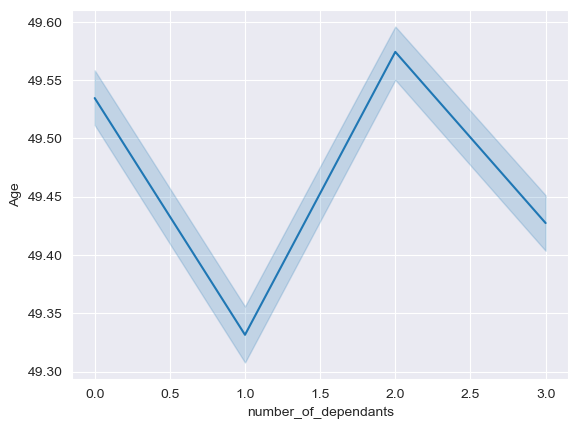

In [37]:
df_4 = small[['Age', 'number_of_dependants']]
line_age_dependents = sns.lineplot(data= df_4, x= 'number_of_dependants', y= 'Age')

The line is generally increasing as Age increases, indicating that people tend to have more dependents as they get older. There a few possible explanations for this trend, such as the fact that people are more likely to get married and have children later in life, care for elderly parents as they get older, and have grandchildren and other relatives who depend on them for support.

In [38]:
line_age_dependents.figure.savefig(os.path.join(path, 'Visualizations', 'Ex_4.9_Charts', 'line_age_dependents.png'))

7.	You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
o	In a markdown cell beneath your scatterplot, describe what the scatterplot shows.


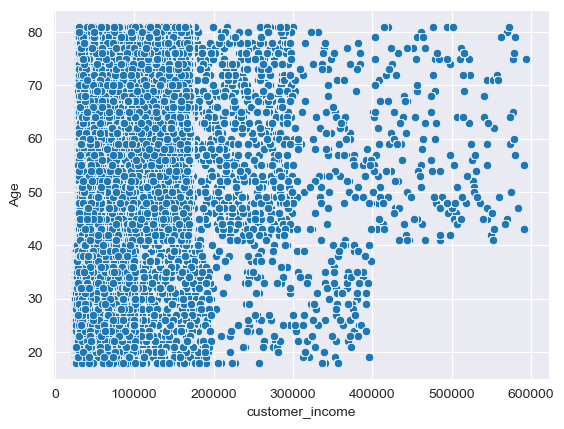

In [39]:
scatterplot_age_income = sns.scatterplot(x= 'customer_income', y= 'Age', data= ords_prods_merge)

The scatterplot shows that there is a positive correlation between customer age and customer income, meaning that customers tend to earn more money as they get older. It also shows a wide range of incomes for customers of all ages. There are some young customers who earn a lot of money, and there are some older customers who earn less money. This is likely due to a number of factors, such as the customer's industry, occupation, education, and experience.

In [40]:
scatterplot_age_income.figure.savefig(os.path.join(path, 'Visualizations', 'Ex_4.9_Charts', 'scatterplot_age_income.png'))

In [41]:
ords_prods_merge['customer_income'].describe()

count    3.032876e+07
mean     9.954015e+04
std      4.310834e+04
min      2.590300e+04
25%      6.712900e+04
50%      9.666500e+04
75%      1.279650e+05
max      5.939010e+05
Name: customer_income, dtype: float64

In [42]:
ords_prods_merge['Age'].describe()

count    3.032876e+07
mean     4.946447e+01
std      1.848533e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

The next part is partcularly with respect to Question 4 under the Key Questions in the Project Brief: 
4. Are there certain types of products that are more popular than others? The marketing
and sales teams want to know which departments have the highest frequency of
product orders.

In [44]:
data_dict = {'1': {'department': 'frozen'},
             '2': {'department': 'other'},
             '3': {'department': 'bakery'},
             '4': {'department': 'produce'},
             '5': {'department': 'alcohol'},
             '6': {'department': 'international'},
             '7': {'department': 'beverages'},
             '8': {'department': 'pets'},
             '9': {'department': 'dry goods pasta'},
             '10': {'department': 'bulk'},
             '11': {'department': 'personal care'},
             '12': {'department': 'meat seafood'},
             '13': {'department': 'pantry'},
             '14': {'department': 'breakfast'},
             '15': {'department': 'canned goods'},
             '16': {'department': 'dairy eggs'},
             '17': {'department': 'household'},
             '18': {'department': 'babies'},
             '19': {'department': 'snacks'},
             '20': {'department': 'deli'},
             '21': {'department': 'missing'}}

In [55]:
# Group by department_id and calculate the sum of order_number
department_order_counts = ords_prods_merge.groupby('department_id')['order_number'].sum()

In [56]:
# Map department IDs to department names using the data dictionary
department_order_counts = department_order_counts.reset_index()
department_order_counts['department_name'] = department_order_counts['department_id'].astype(str).map(data_dict).apply(lambda x: x['department'] if x is not None else 'Unknown')

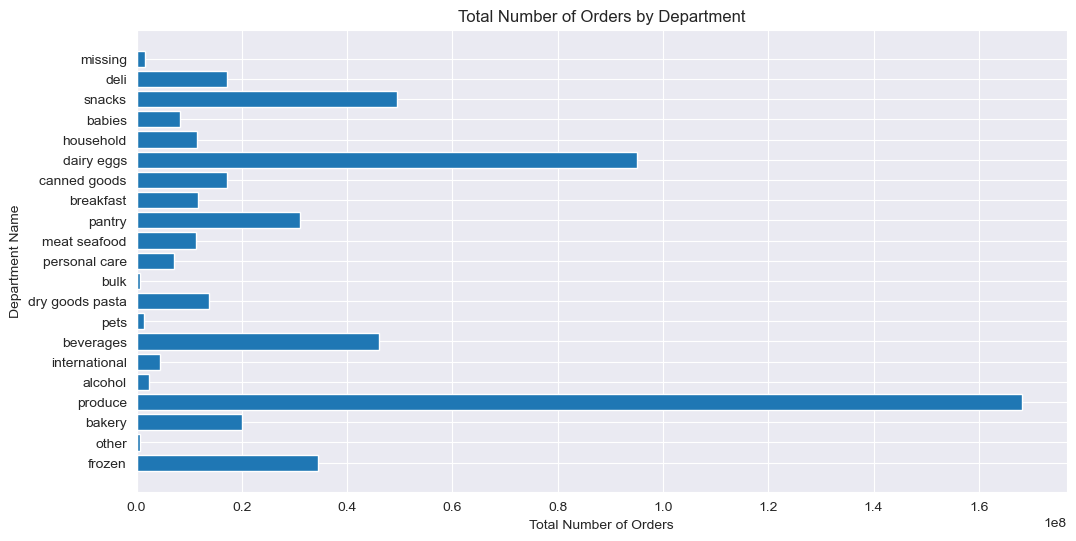

In [57]:
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(department_order_counts['department_name'], department_order_counts['order_number'])
plt.xlabel('Total Number of Orders')
plt.ylabel('Department Name')
plt.title('Total Number of Orders by Department')
plt.show()